In [30]:
%matplotlib inline

In [42]:
from __future__ import absolute_import
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [47]:
'''
    Train a simple convnet on the MNIST dataset.
    Run on GPU: THEANO_FLAGS=mode=FAST_RUN,device=gpu,floatX=float32 python mnist_cnn.py
    Get to 99.25% test accuracy after 12 epochs (there is still a lot of margin for parameter tuning).
    16 seconds per epoch on a GRID K520 GPU.
'''

batch_size = 128
nb_classes = 10
nb_epoch = 12

# shape of the image (SHAPE x SHAPE)
shapex, shapey = 28, 28
# number of convolutional filters to use
nb_filters = 32
# level of pooling to perform (POOL x POOL)
nb_pool = 2
# level of convolution to perform (CONV x CONV)
nb_conv = 3

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Reduce the size of the dataset
ndat=10000
ntest=2000
X_train=X_train[:ndat]
Y_train=Y_train[:ndat]
X_test=X_test[:ntest]
Y_test=Y_test[:ntest]

X_train = X_train.reshape(X_train.shape[0], 1, shapex, shapey)
X_test = X_test.reshape(X_test.shape[0], 1, shapex, shapey)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (10000, 1, 28, 28)
10000 train samples
2000 test samples


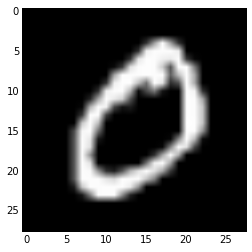

In [45]:
plt.imshow(X_train[1][0],cmap='gray')

In [48]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

model = Sequential()

model.add(Convolution2D(nb_filters, 1, nb_conv, nb_conv, border_mode='full'))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, nb_filters, nb_conv, nb_conv))
model.add(Activation('relu'))
model.add(MaxPooling2D(poolsize=(nb_pool, nb_pool)))
model.add(Dropout(0.25))

model.add(Flatten())
# the resulting image after conv and pooling is the original shape
# divided by the pooling with a number of filters for each "pixel"
# (the number of filters is determined by the last Conv2D)
model.add(Dense(nb_filters * (shapex / nb_pool) * (shapey / nb_pool), 128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(128, nb_classes))
model.add(Activation('softmax'))

/usr/local/lib/python2.7/dist-packages/keras/initializations.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return sharedX(np.random.uniform(low=-scale, high=scale, size=shape))


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta')

In [ ]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, show_accuracy=True, verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, show_accuracy=True, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 10000 samples, validate on 2000 samples
Epoch 0
  640/10000 [>.............................] - ETA: 262s - loss: 2.1112 - acc: 0.2453

4.444444444444445